<h1 style="text-align:center">Convoluzione di segnali monodimensionali e bidimensionali</h1>

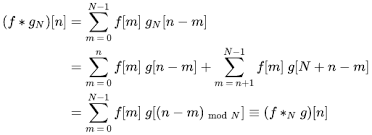</img>

Con convoluzione si intende l'applicazione di un filtro a un segnale con la volontà di alterarlo. Si utilizza sia nei segnali monodimensionali (come i suoni) per togliere determinate frequenze, o nelle serie storiche con l'obbiettivo di eliminare i pattern di stagionalità. Nei segnali bidimensionali (immagini) lo si applica per diminuire il rumore o per uniformare aree confuse. In generale lo si applica quando si ha la necessità di normalizzare un segnale.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import copy

<h2>Convoluzione monodimensionale</h2>

In [2]:
class CbThMono:
    def __init__(self,segnale,filtro):
        self.segnale = list(segnale)
        self.filtro = filtro
        
    def Convolvi(self,segnale,filtro,n):
        sums = []
        for i in range(0,len(self.filtro)):
            sums.append(segnale[i+n]*self.filtro[i])
        return sum(sums)
    def ZeroPadding(self,segnale):
        tmp = copy.deepcopy(self.segnale)
        tmp.insert(0,0)
        tmp.append(0)
        return tmp
    def Convoluzione(self):
        out = [] 
        n = len(self.segnale)
        tmp = self.ZeroPadding(self.segnale)
        for i in range(0,n):
            out.append(self.Convolvi(tmp,self.filtro,i))
        return out
    def Summary(self):
        str_out = "Segnale: "+str(self.segnale)+" \n Filtro: "+str(self.filtro)+" \n Trasformata: "+str(self.Convoluzione())
        return str_out
    def Grafico(self,annotate=True):
        sns.set()
        plt.figure(dpi=420)
        plt.title("Risultato filtro")
        plt.plot(self.segnale,label="Segnale",c="black")
        plt.plot(self.Convoluzione(),label="Convoluzione",c="violet")
        if (annotate):
            x = 0
            for i in self.segnale:
                plt.annotate(str(round(i,2)),xy=(x,i+0.1),size=5)
                x = x+1
            x = 0
            for i in self.Convoluzione():
                plt.annotate(str(round(i,2)),xy=(x,i+0.1),size=5,color="violet")
                x = x+1
        plt.legend(loc="lower left")
        plt.show()

<p>Il segnale viene preso in maniera casuale: è possibile modificarlo</p>

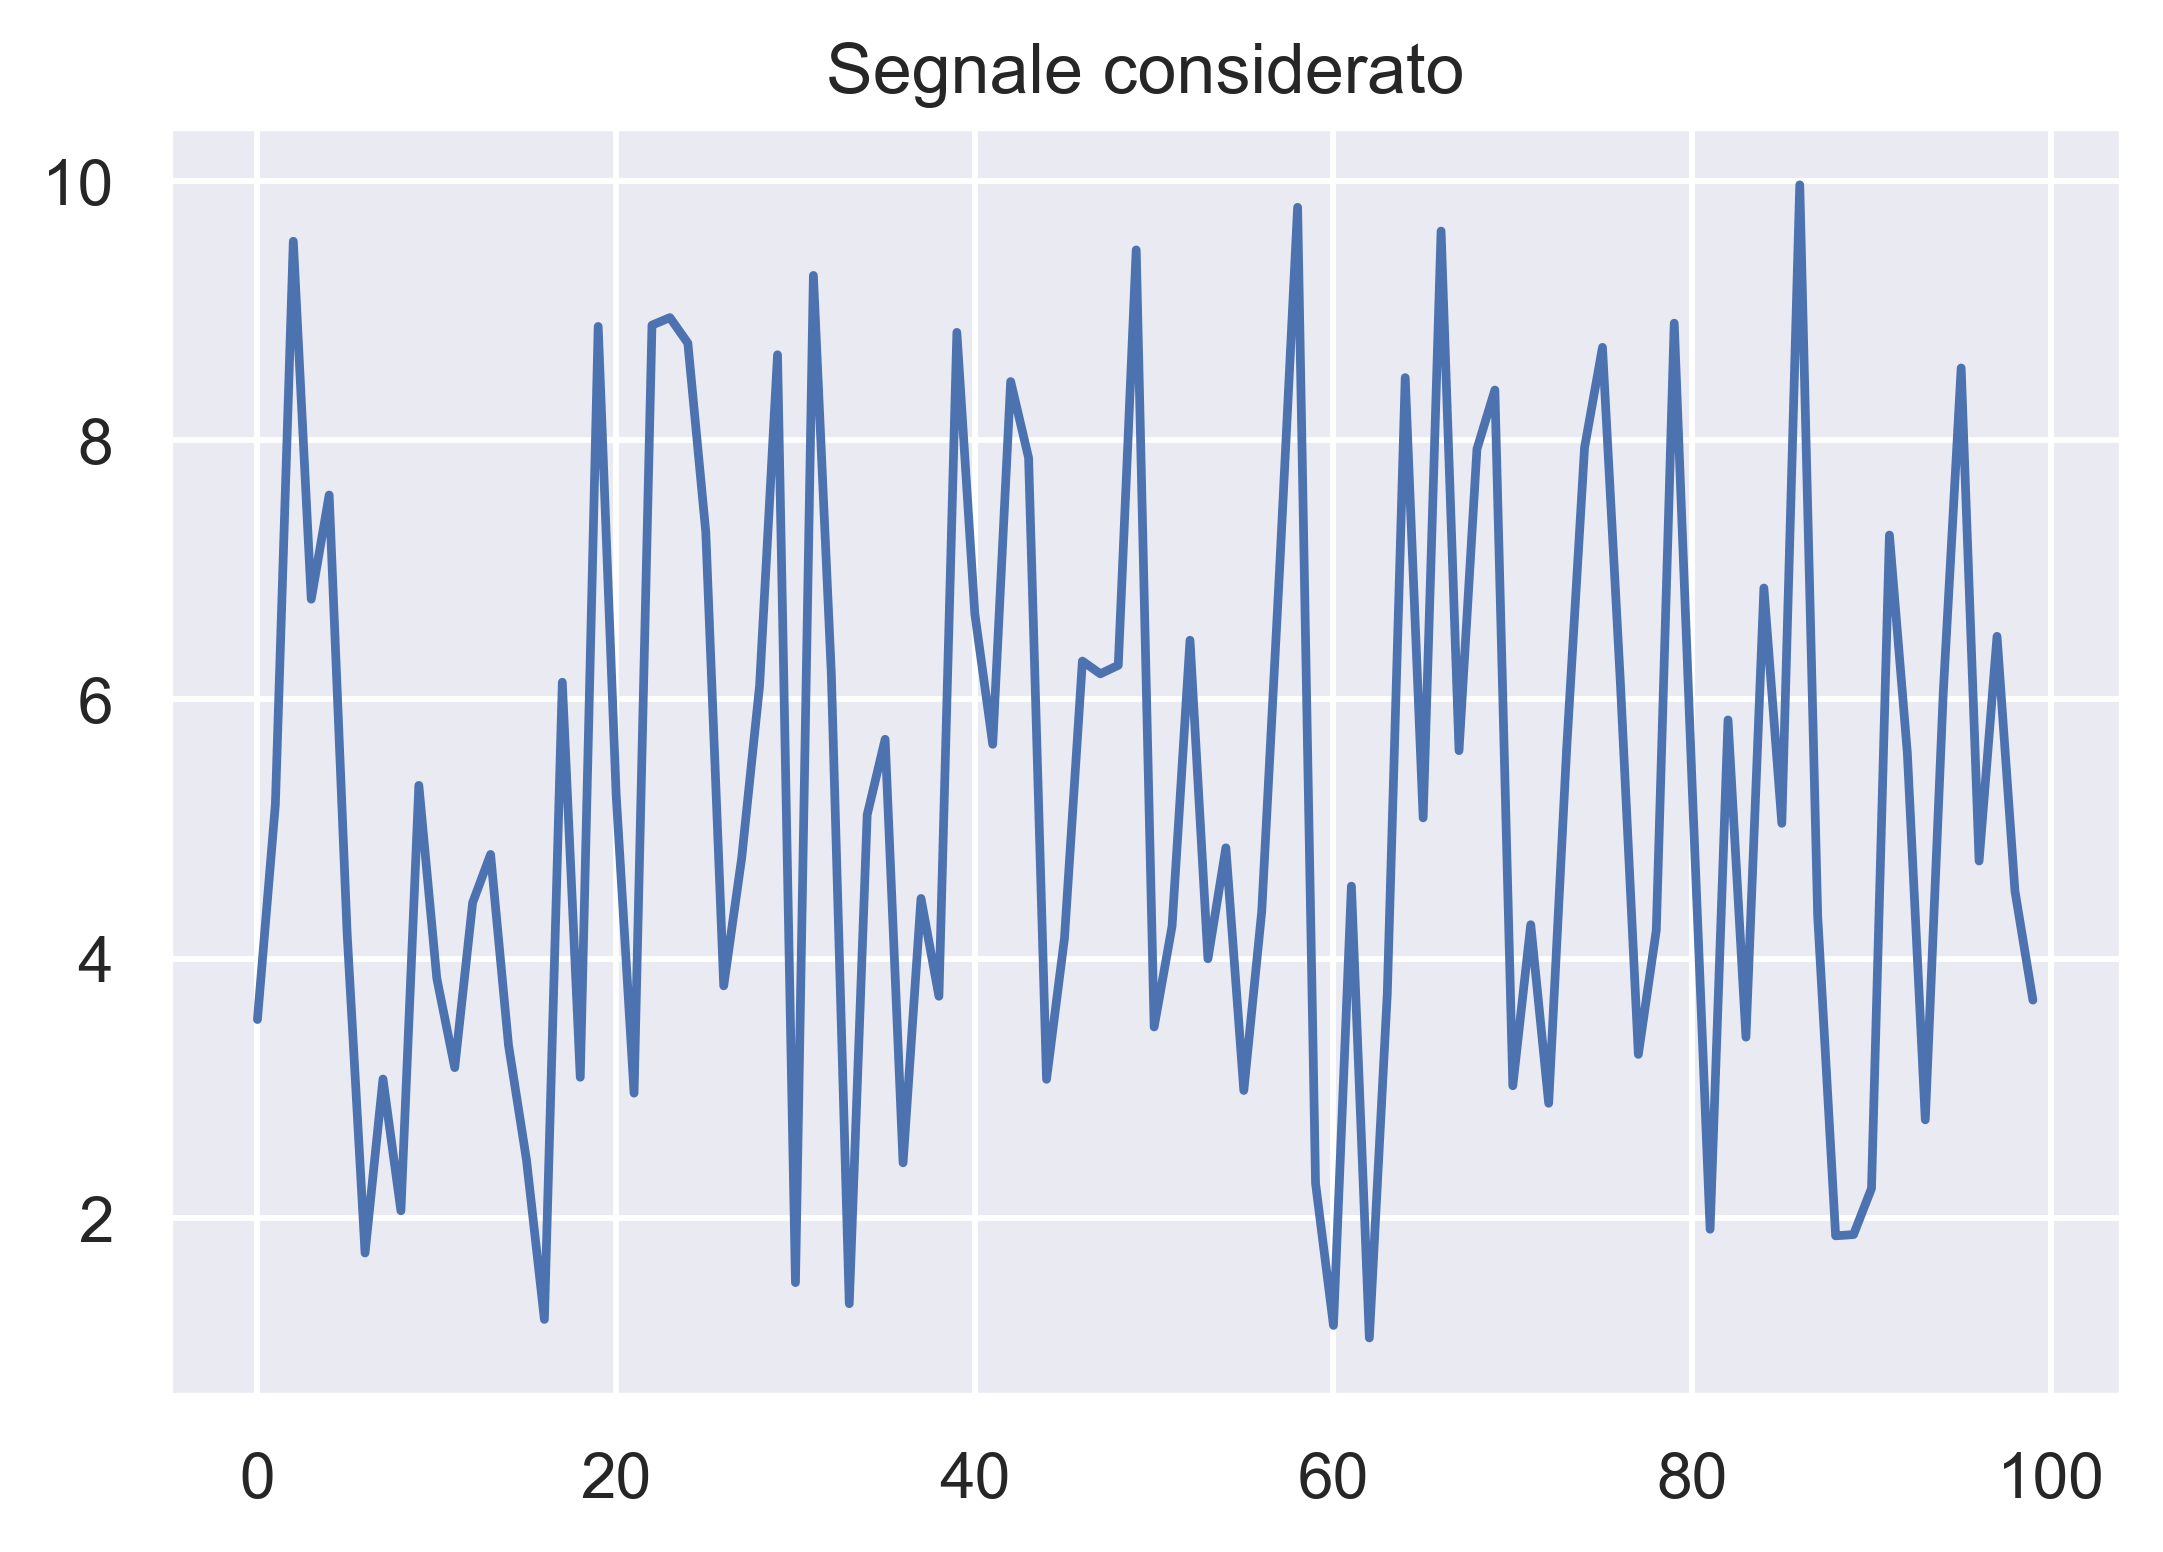

In [3]:
segnale = np.random.uniform(1,10,100)
sns.set()
plt.figure(dpi=420)
plt.plot(segnale)
plt.title("Segnale considerato")
plt.show()

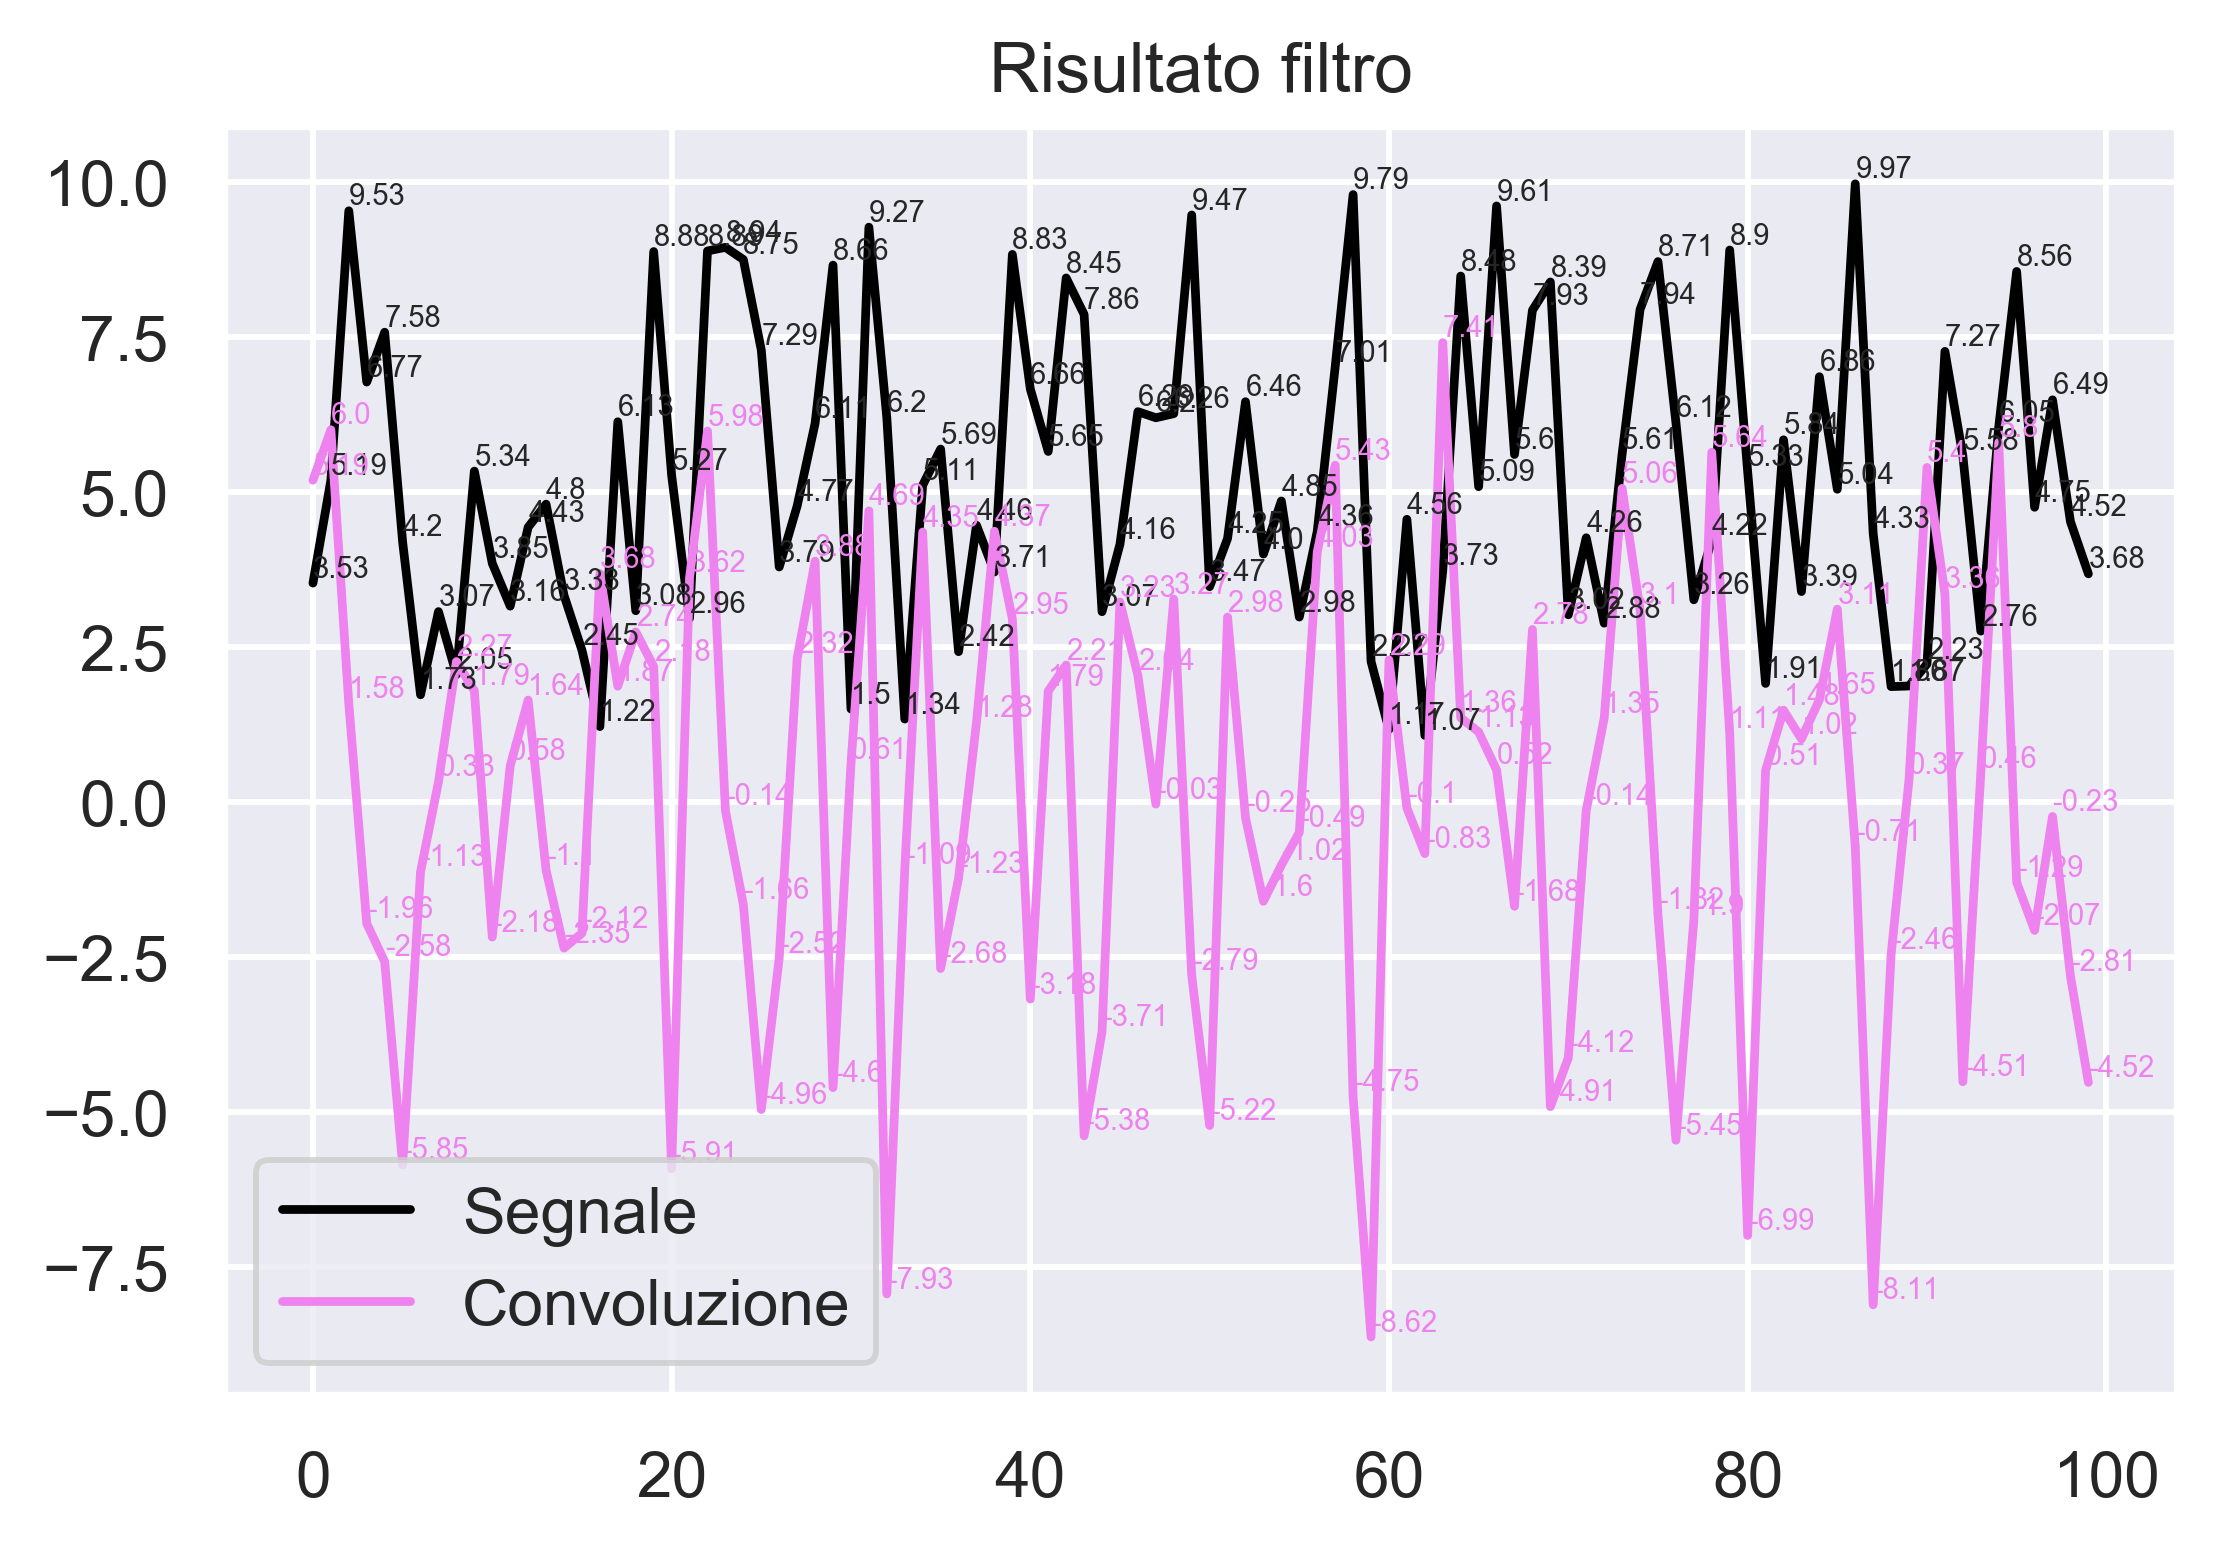

In [4]:
filtro = [-1,0,1]
CbThMono(segnale,filtro).Convoluzione()
CbThMono(segnale,filtro).Summary()
CbThMono(segnale,filtro).Grafico()

<h3>Convoluzione di una serie temporale</h3>

In [5]:
time = pd.read_csv("dataset/MTGTimeSeries.csv",parse_dates=['Datetime'])
filtro = [1/3,1/3,1/3]
print("Numero osservazioni: ",len(time))
time.head(10)

Numero osservazioni:  105


Datetime    N
0 2018-11-07  115
1 2018-11-11  835
2 2018-11-14  649
3 2018-11-18  581
4 2018-11-21  379
5 2018-11-25  562
6 2018-11-28  175
7 2018-12-02  500
8 2018-12-05  189
9 2018-12-09  540

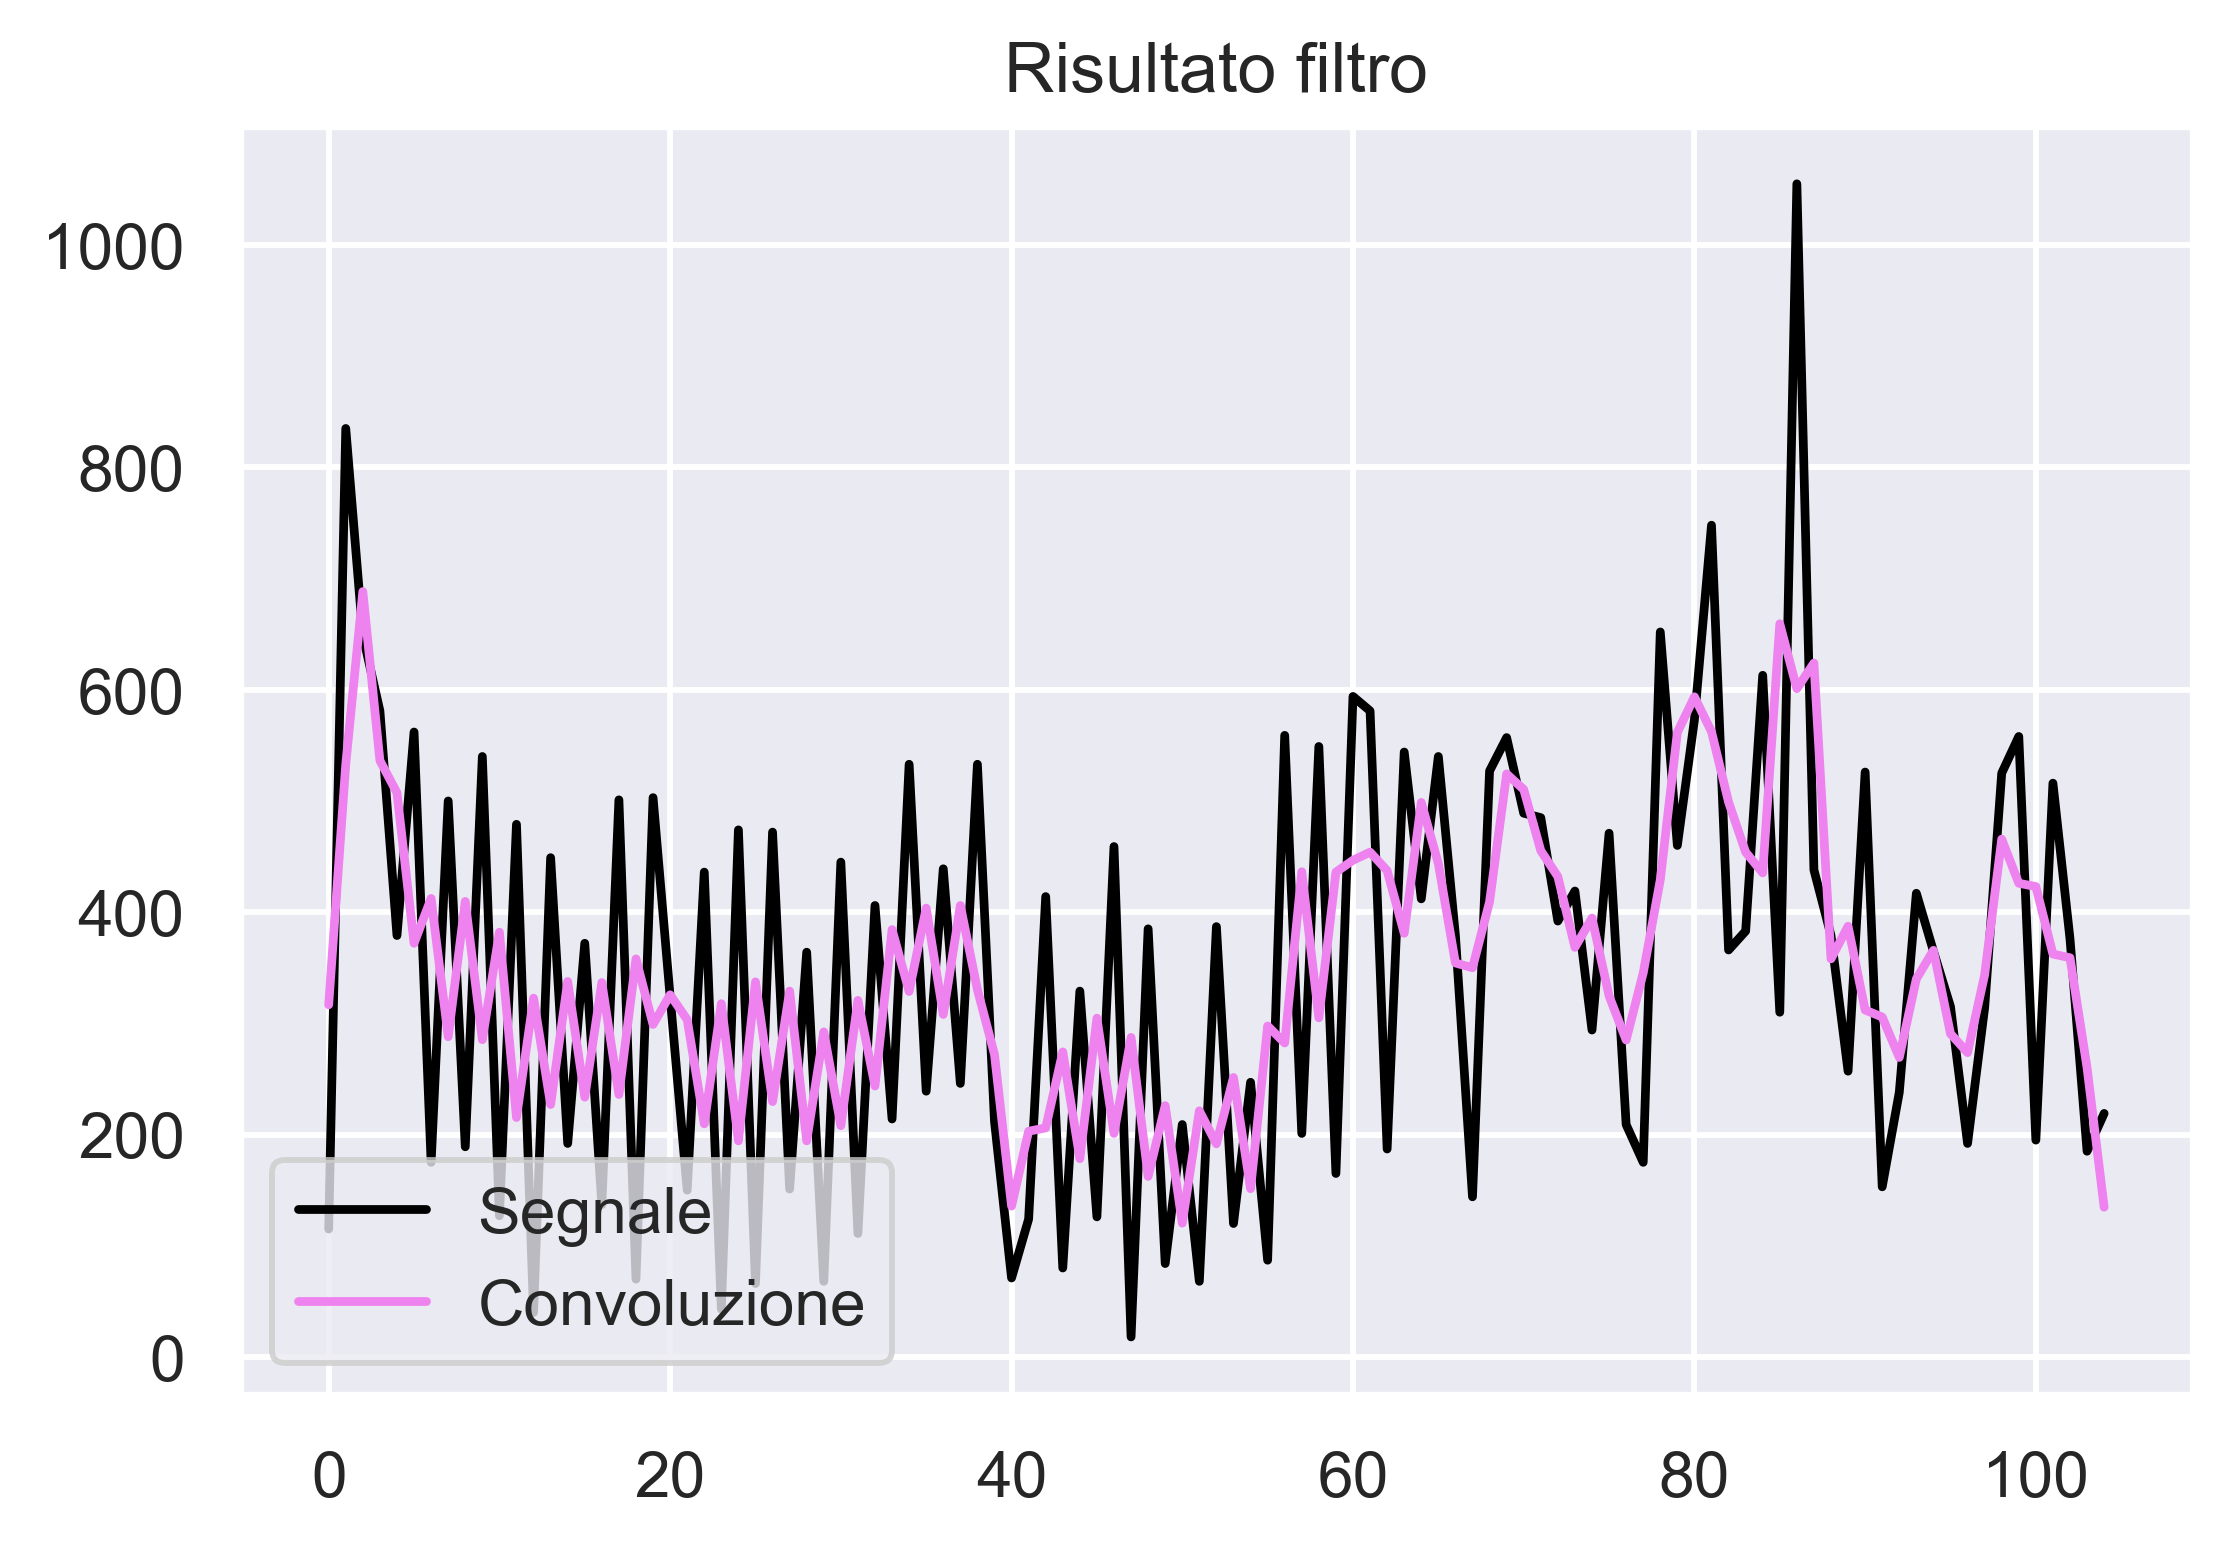

In [6]:
CbThMono(time.N,filtro).Grafico(annotate=False)

### Convoluzione di un segnale monodimensionale: file wav

In [7]:
import IPython.display as ipd
from scipy.io import wavfile as wav

In [8]:
violin_r, violin = wav.read("sound/violin.wav")
ipd.Audio(violin,rate=violin_r)

In [9]:
filtro = [10,0,10]
ipd.Audio(CbThMono(violin,filtro).Convoluzione(),rate=violin_r)

Nonostante la convoluzione non porti risultati apprezzabili all'orecchio, notiamo come abbia avuto effetto nella modifica del segnale

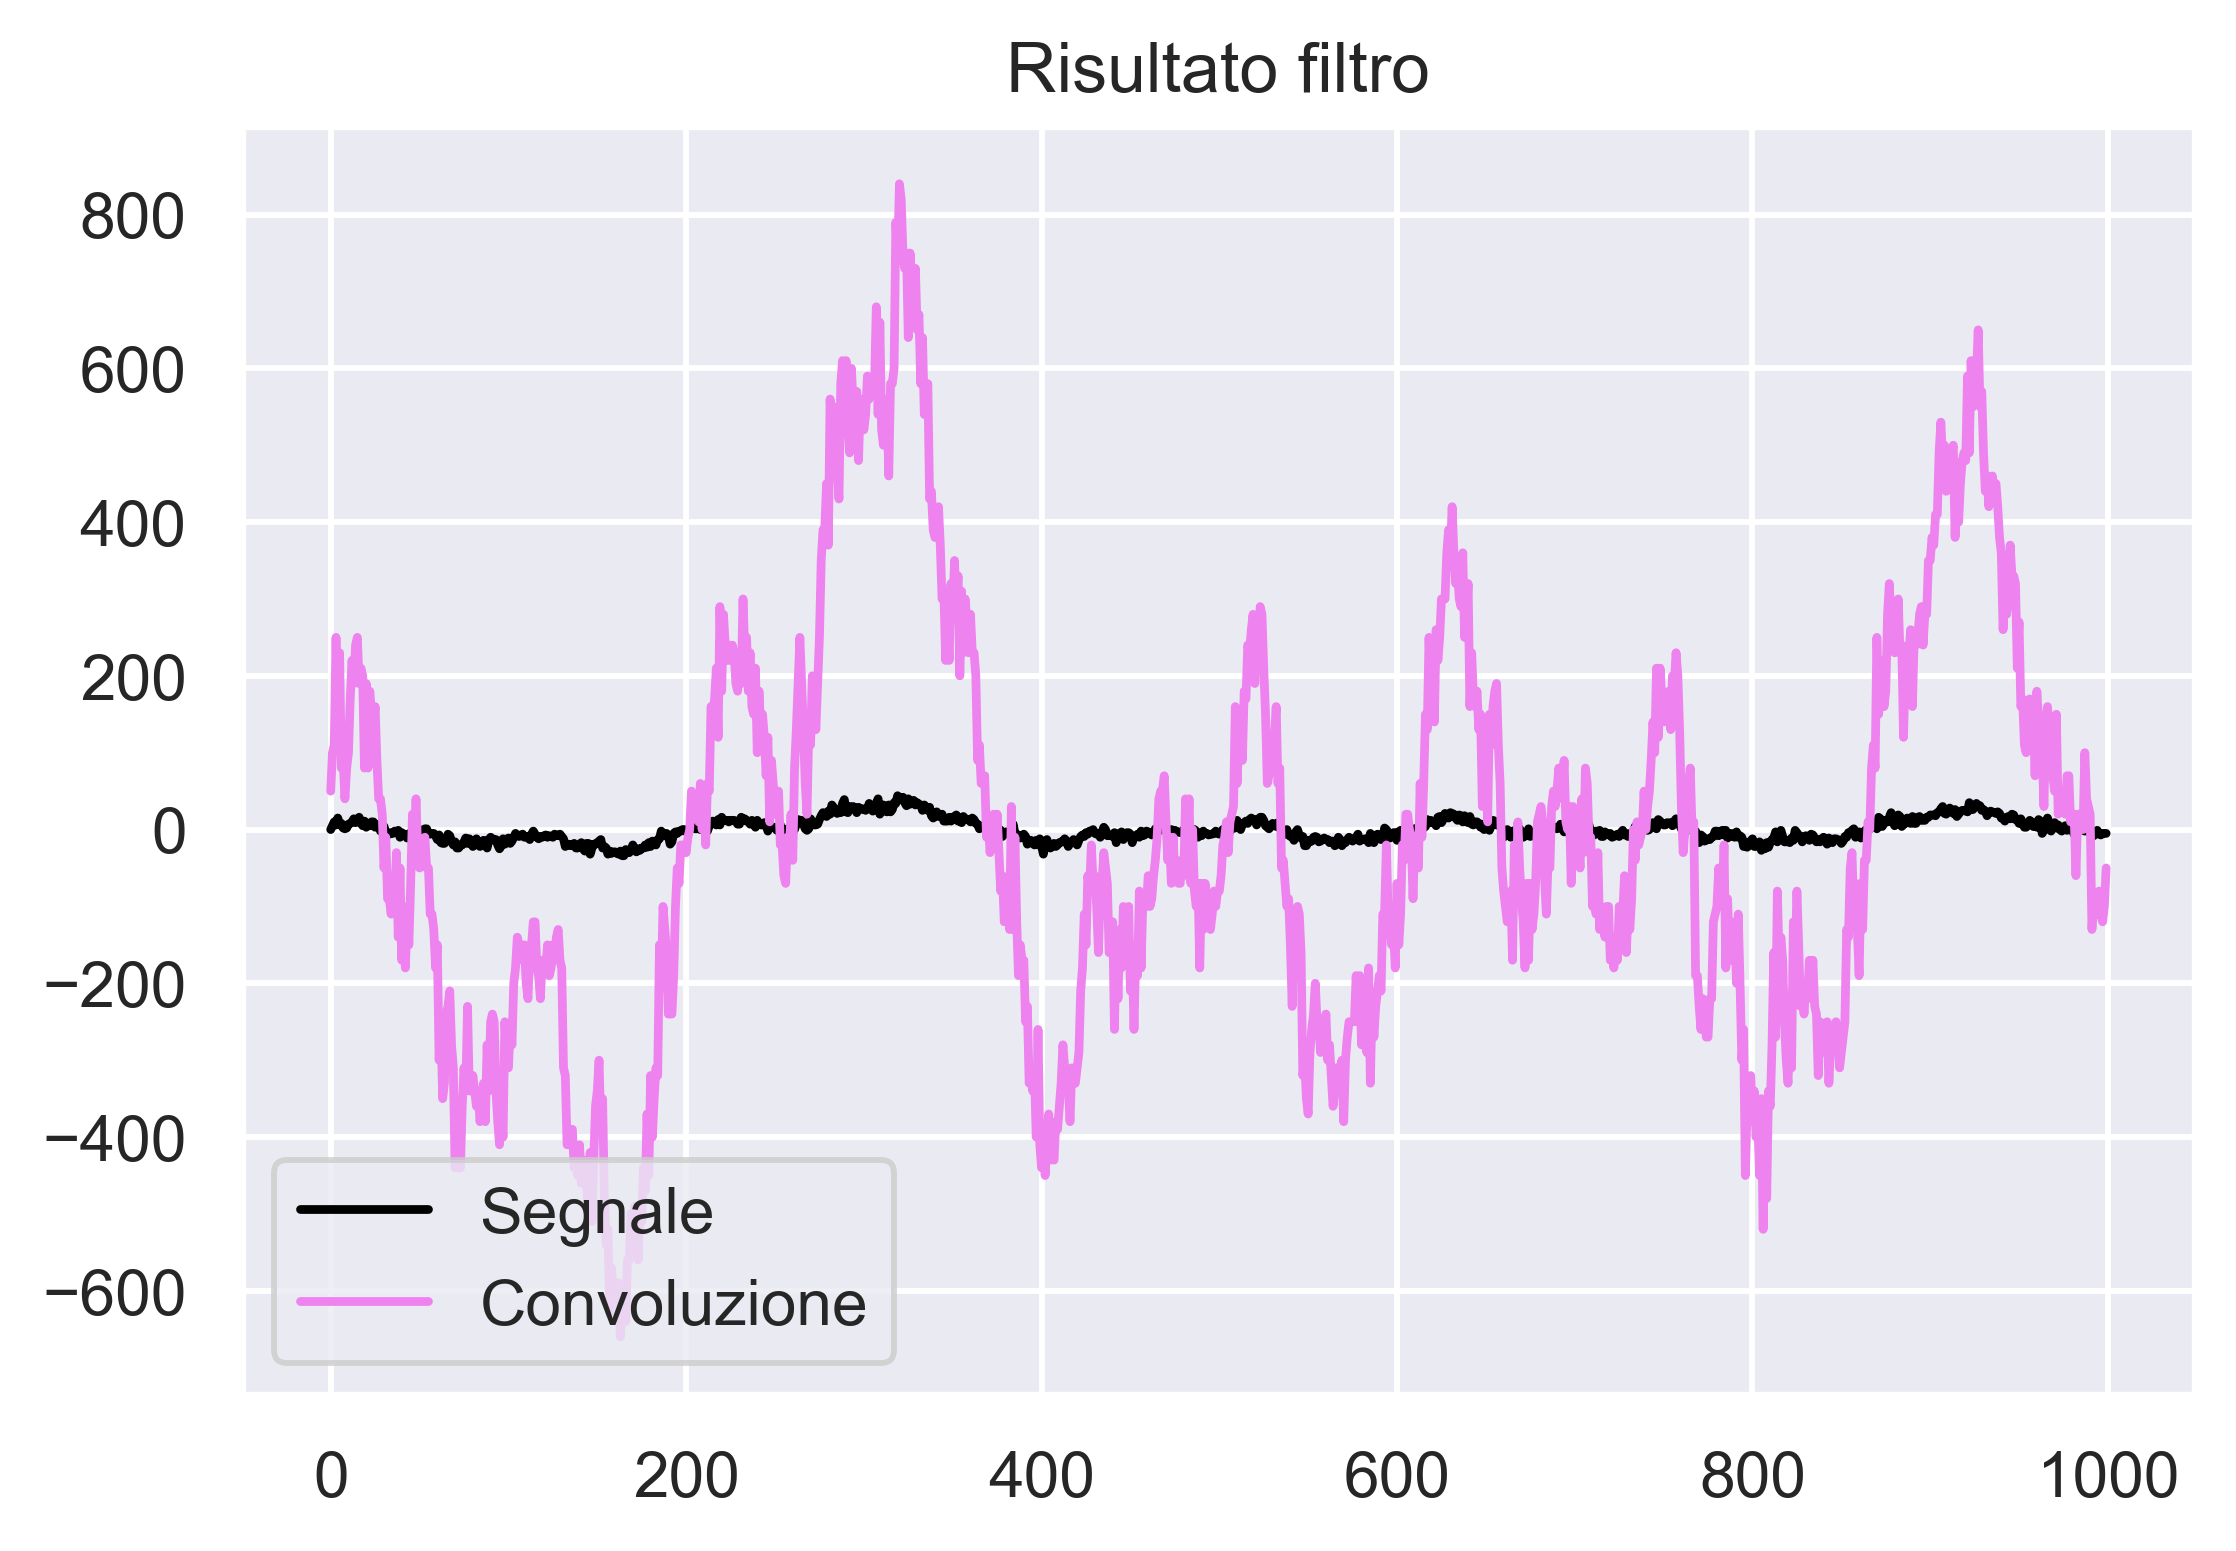

In [10]:
filtro = [10,0,10]
CbThMono(violin[:1000],filtro).Grafico(annotate=False)

<h2>Convoluzione di un segnale bidimensionale</h2>

In [11]:
class CbThBi:
    def __init__(self,segnale,filtro):
        self.segnale = segnale
        self.filtro = filtro
        
    def Convolvi(self,segnale,filtro,y,x,lfilter,hfilter):
        sums = []
        #per ogni elemento della colonna del filtro
        for h in range(0,hfilter):
            #per ogni elemento della riga del filtro
            for l in range(0,lfilter):
                #prodotto del valore della matrice iesima con il valore del filtro della posizione jesima
                #y e x n on sono altro che i valori che permettono di spostarsi in avanti la matrice (il fitro non si muove)
                sums.append(segnale.item(h+y,l+x)*filtro.item(h,l))
        #print(sums)
        if ((sum(filtro)).sum() != 0): #controllo per il denominatore diverso da 0
            return (sum(sums))*(1/(sum(filtro)).sum()) #dividiamo per i valori del filtro per "standardizzare"
        else:
            return (sum(sums)) #se il denominatore è zero non possiamo dividere, quindi prendiamo il valore e basta
    
    def ZeroPadding(self):
            l = self.filtro.shape[0]
            h = self.filtro.shape[1]
            tmp = copy.deepcopy(self.segnale)
            tmp = np.pad(tmp,(l-2,h-2),"constant") #qua si aggiungono zeri pari alla grandezza del filtro -2 (3x3 = 1 zero, 4x4 = 2 zero)
            return tmp

    def Convoluzione(self):
        out = [] 
        #prendere il numero di colonne del filtro
        hfiltro = self.filtro.shape[0]
        #prendere il numero di righe del filtro
        lfiltro = self.filtro.shape[1]
        #prendere il numero di colonne della matrice
        hh = self.segnale.shape[0]
        #prendere il numero di righe della matrice
        ll = self.segnale.shape[1]
        #applichiamo zero padding (per un filtro 3x3 basta aggiungere 1 zero, per altri filtri bisogna considerare + zeri)
        tmp = self.ZeroPadding()
        #per ogni elemento di ogni colonna della matrice
        for h in range(0,hh):
            #per ogni elemento di ogni riga della matrice
            for l in range(0,ll):
                #si applica la convoluzione utilizzando il filtro e gli elementi coincidenti della matrice
                #si passa la matrice sotto zeropadding, il valore di colonna, il valore di riga, e le grandezze del filtro
                out.append(self.Convolvi(tmp,self.filtro,h,l,hfiltro,lfiltro))
        #ritorna la matrice di grandezza uguale alla prima
        return np.asmatrix(out).reshape(hh,ll)

    def Grafico(self):
        #sns.set(style="darkgrid")
        plt.figure(dpi=420)
        plt.subplot(2,2,1)
        sns.heatmap(self.segnale)
        plt.subplot(2,2,2)
        sns.heatmap(self.Convoluzione())
        plt.show()
    
    def Image(self):
        plt.figure(dpi=420)
        confronto = np.concatenate((self.segnale,self.Convoluzione()), axis = 1)
        plt.imshow(confronto,cmap='gray')
        
    def Summary(self):
        print("Segnale:\n",self.segnale,"\nFiltro:\n",filtro, "\nConvoluzione:\n",self.Convoluzione())

### Convoluzone segnale bidimensionale 

<p>Definiamo una funzione che ci permette di creare una matrice randomica. Utilizziamo una matrice plottandola come una heatmap, dove ogni valore del campo della matrice è considerato un pixel <br> Come filtro utilizzeremo una matrice 3x3 average</p>

In [12]:
def randomMatrix(columns,row,lmin=0,lmax=2):
    matrix = []
    for i in range(0,columns):
        matrix.append(np.random.randint(lmin,lmax,row))
    return np.matrix(matrix)

Creiamo una matrice con valori casuali. Ogni valore della matrice identifica un pixel. 

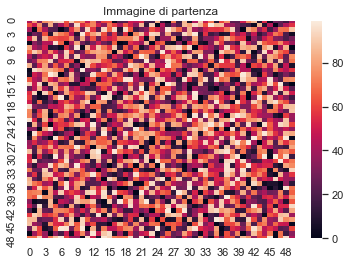

In [13]:
base = randomMatrix(50,50,0,100)
plt.title("Immagine di partenza")
sns.heatmap(base)
plt.show()

Definiamo il filtro 3x3 da utilizzare. In base al filtro utilizzato cambierà l'applicazione che andremo ad effettuare sull'immagine (blurring/sharpening)

In [14]:
def chooseFilter(nomeFiltro,annotate=False): 
        if(str.lower(nomeFiltro)=="prewitt-dx"):
            filtro = np.asmatrix(np.array([[0,1,1],[-1,0,1],[-1,-1,0]]))
            if (annotate):
                plt.title("Filtro utilizzato")
                sns.heatmap(filtro,annot=True)
                plt.show()
            return filtro
        elif(str.lower(nomeFiltro)=="prewitt-sx"):
            filtro = np.asmatrix(np.array([[-1,-1,0],[-1,0,1],[0,1,1]]))
            if(annotate):
                plt.title("Filtro utilizzato")
                sns.heatmap(filtro,annot=True)
                plt.show()
            return filtro
        elif(str.lower(nomeFiltro)=="sobel-dx"):
            filtro = np.asmatrix(np.array([[0,1,2],[-1,0,1],[-2,-1,0]]))
            if (annotate):
                plt.title("Filtro utilizzato")
                sns.heatmap(filtro,annot=True)
                plt.show()
            return filtro
        elif(str.lower(nomeFiltro) == "sobel-sx"):
            filtro = np.asmatrix(np.array([[-2,-1,0],[-1,0,1],[0,1,2]]))
            if (annotate):
                plt.title("Filtro utilizzato")
                sns.heatmap(filtro,annot=True)
                plt.show()
            return filtro
        elif(str.lower(nomeFiltro) == "average"):
            filtro = np.asmatrix(np.array([[1/3,1/3,1/3],[1/3,1/3,1/3],[1/3,1/3,1/3]]))
            if(annotate):
                plt.title("Filtro utilizzato")
                sns.heatmap(filtro,annot=True)
                plt.show()
            return filtro
        else:
            #se nessun filtro è stato chiamato, ritorna un filtro a caso 3x3
            filtro = randomMatrix(0,10,0,2)
            if(annotate):
                plt.title("Filtro utilizzato")
                sns.heatmap(filtro,annot=True)
                plt.show()
            return filtro

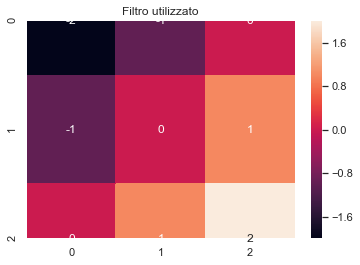

In [15]:
filtro = chooseFilter("sobel-sx",annotate=True)

Applichiamo i vari tipi di convoluzione sulla matrice

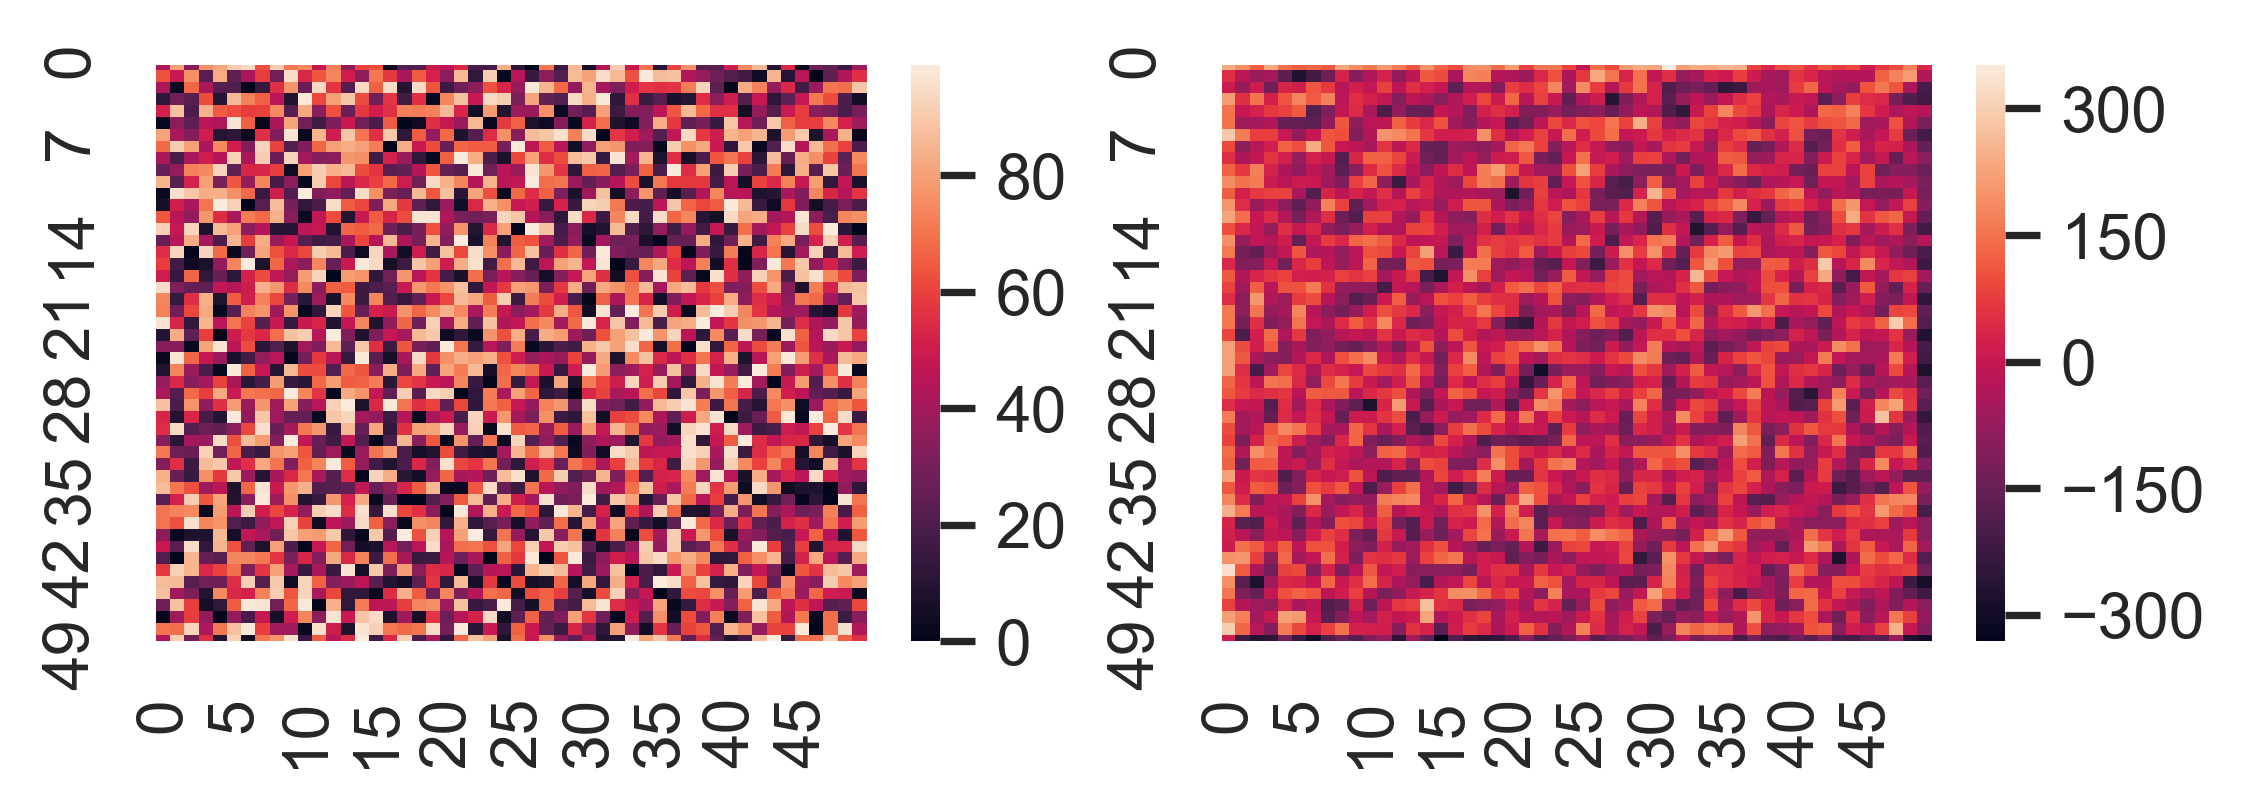

In [16]:
CbThBi(base,chooseFilter("sobel-sx",annotate=False)).Grafico()

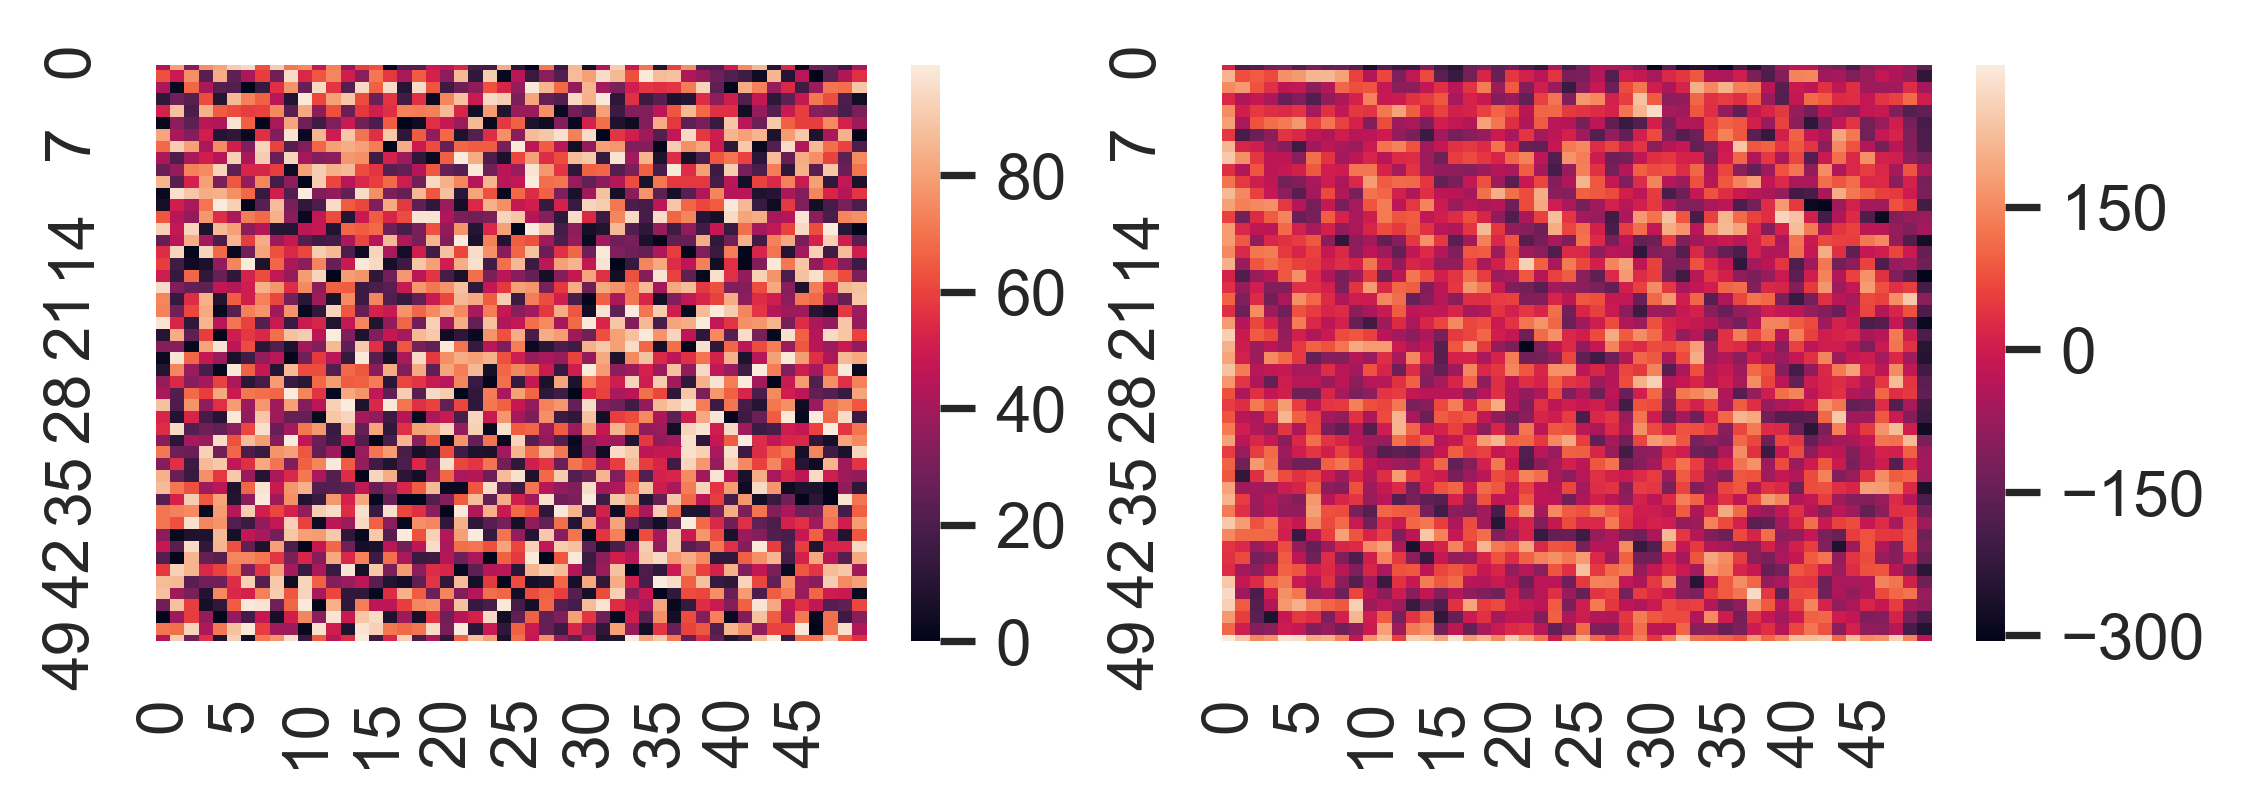

In [17]:
CbThBi(base,chooseFilter("sobel-dx",annotate=False)).Grafico()

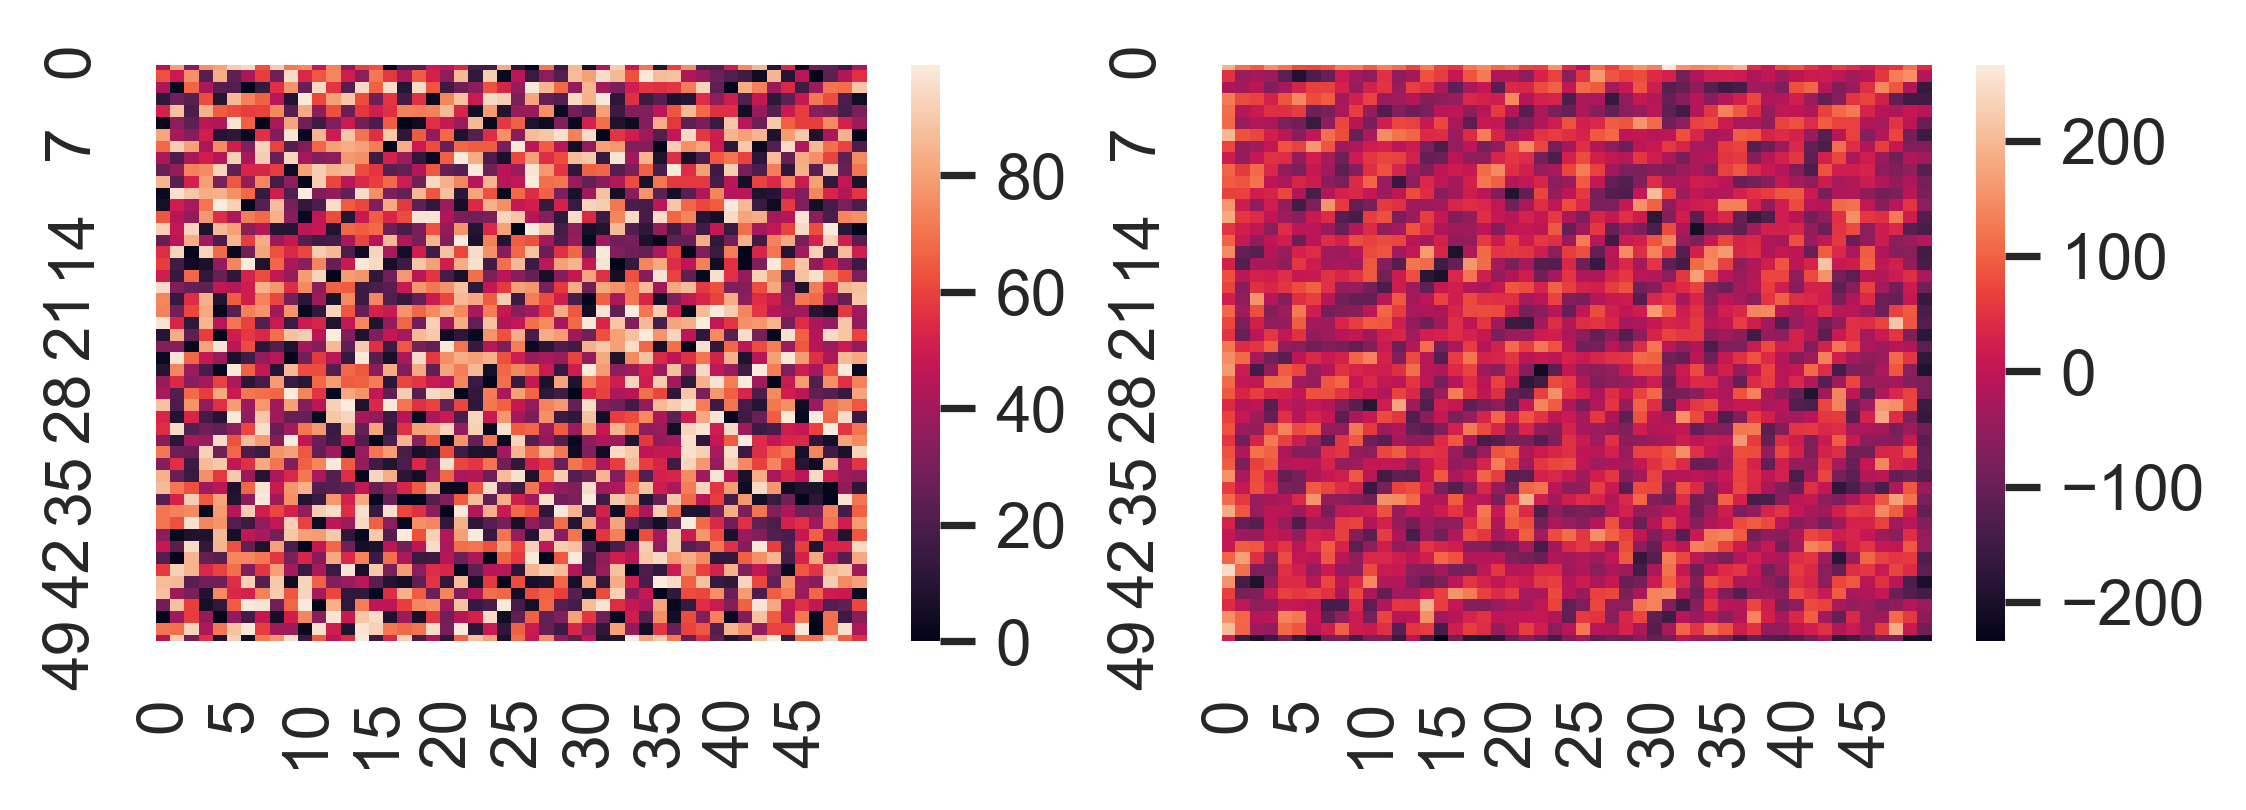

In [18]:
CbThBi(base,chooseFilter("prewitt-sx",annotate=False)).Grafico()

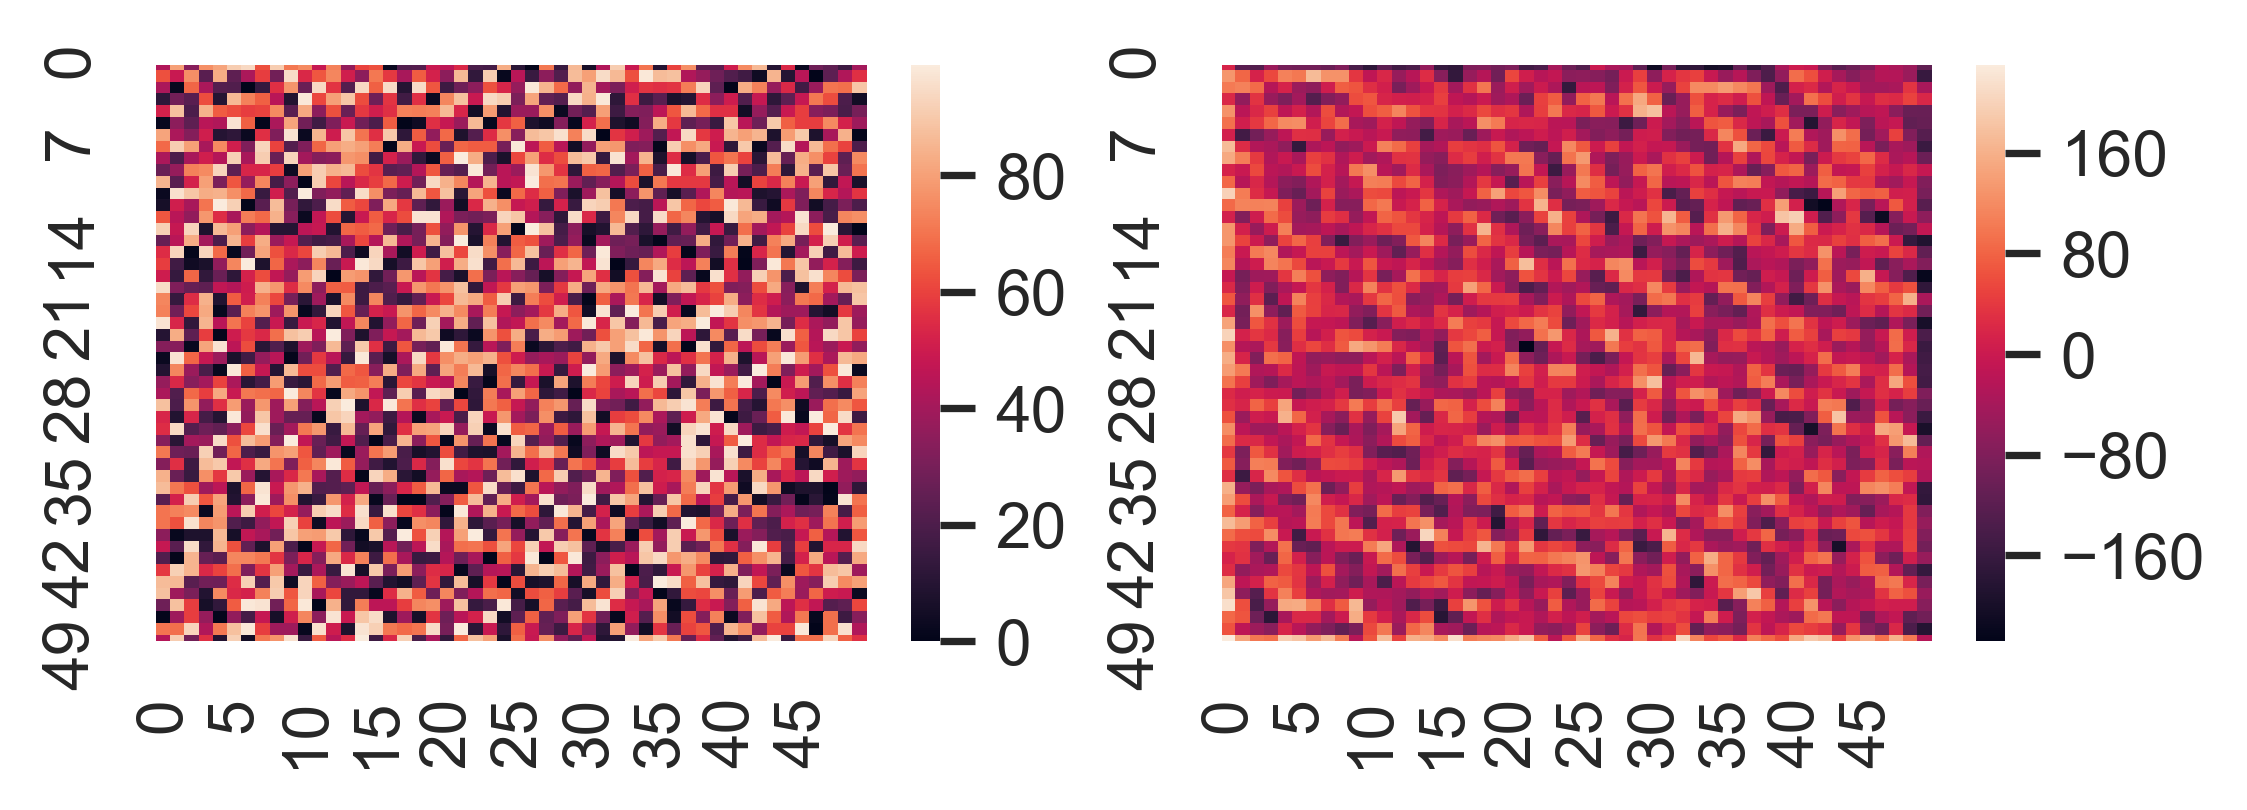

In [19]:
CbThBi(base,chooseFilter("prewitt-dx",annotate=False)).Grafico()

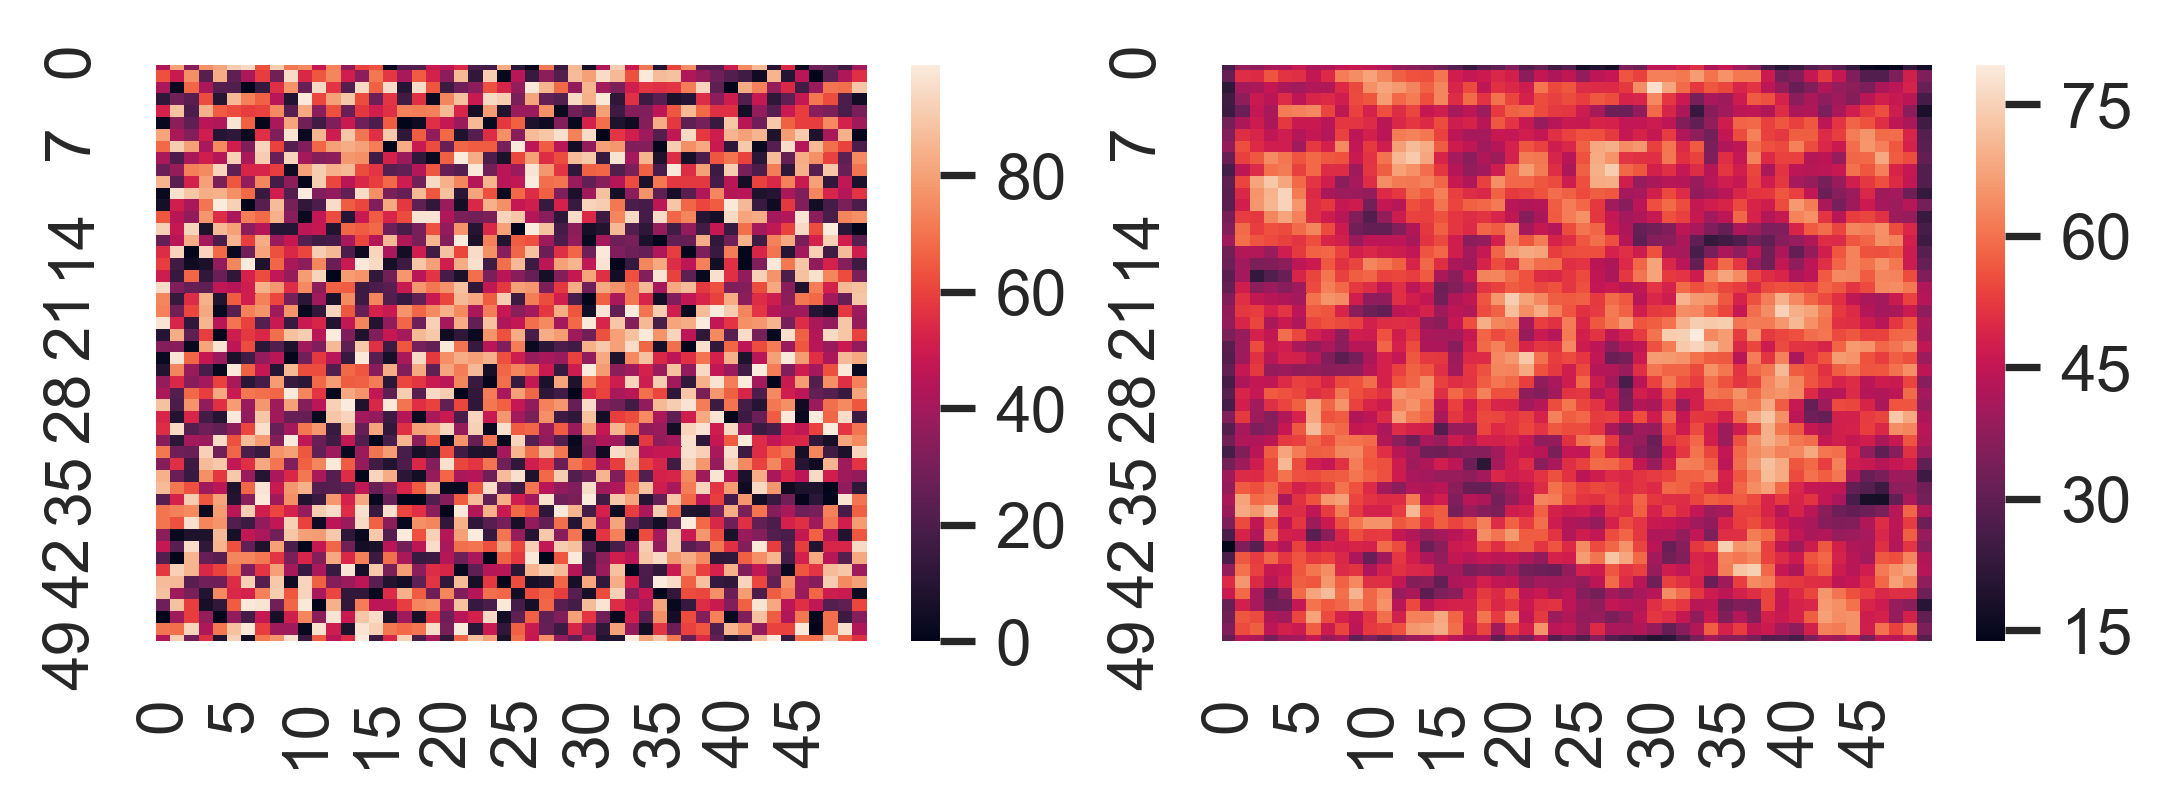

In [20]:
CbThBi(base,chooseFilter("average",annotate=False)).Grafico()

Notiamo come il rumore della matrice è stato 'appiattito' in base al valore dei pixel vicini (quindi vi sono meno punti scuri (valori alti) e punti chiari (valori bassi)). Utilizzando diversi filtri si hanno risultati diversi.

### Convoluzione segnale bidimensionale: file png

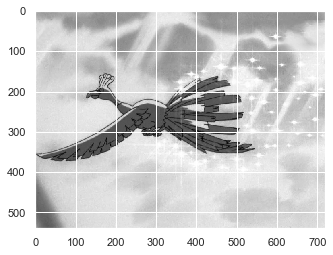

In [21]:
from skimage import io
from skimage import filters
import ipywidgets as widgets
import copy
im = io.imread("image/Ho-Oh_Debut.png",as_gray=True) 
plt.imshow(im, cmap='gray');plt.show()

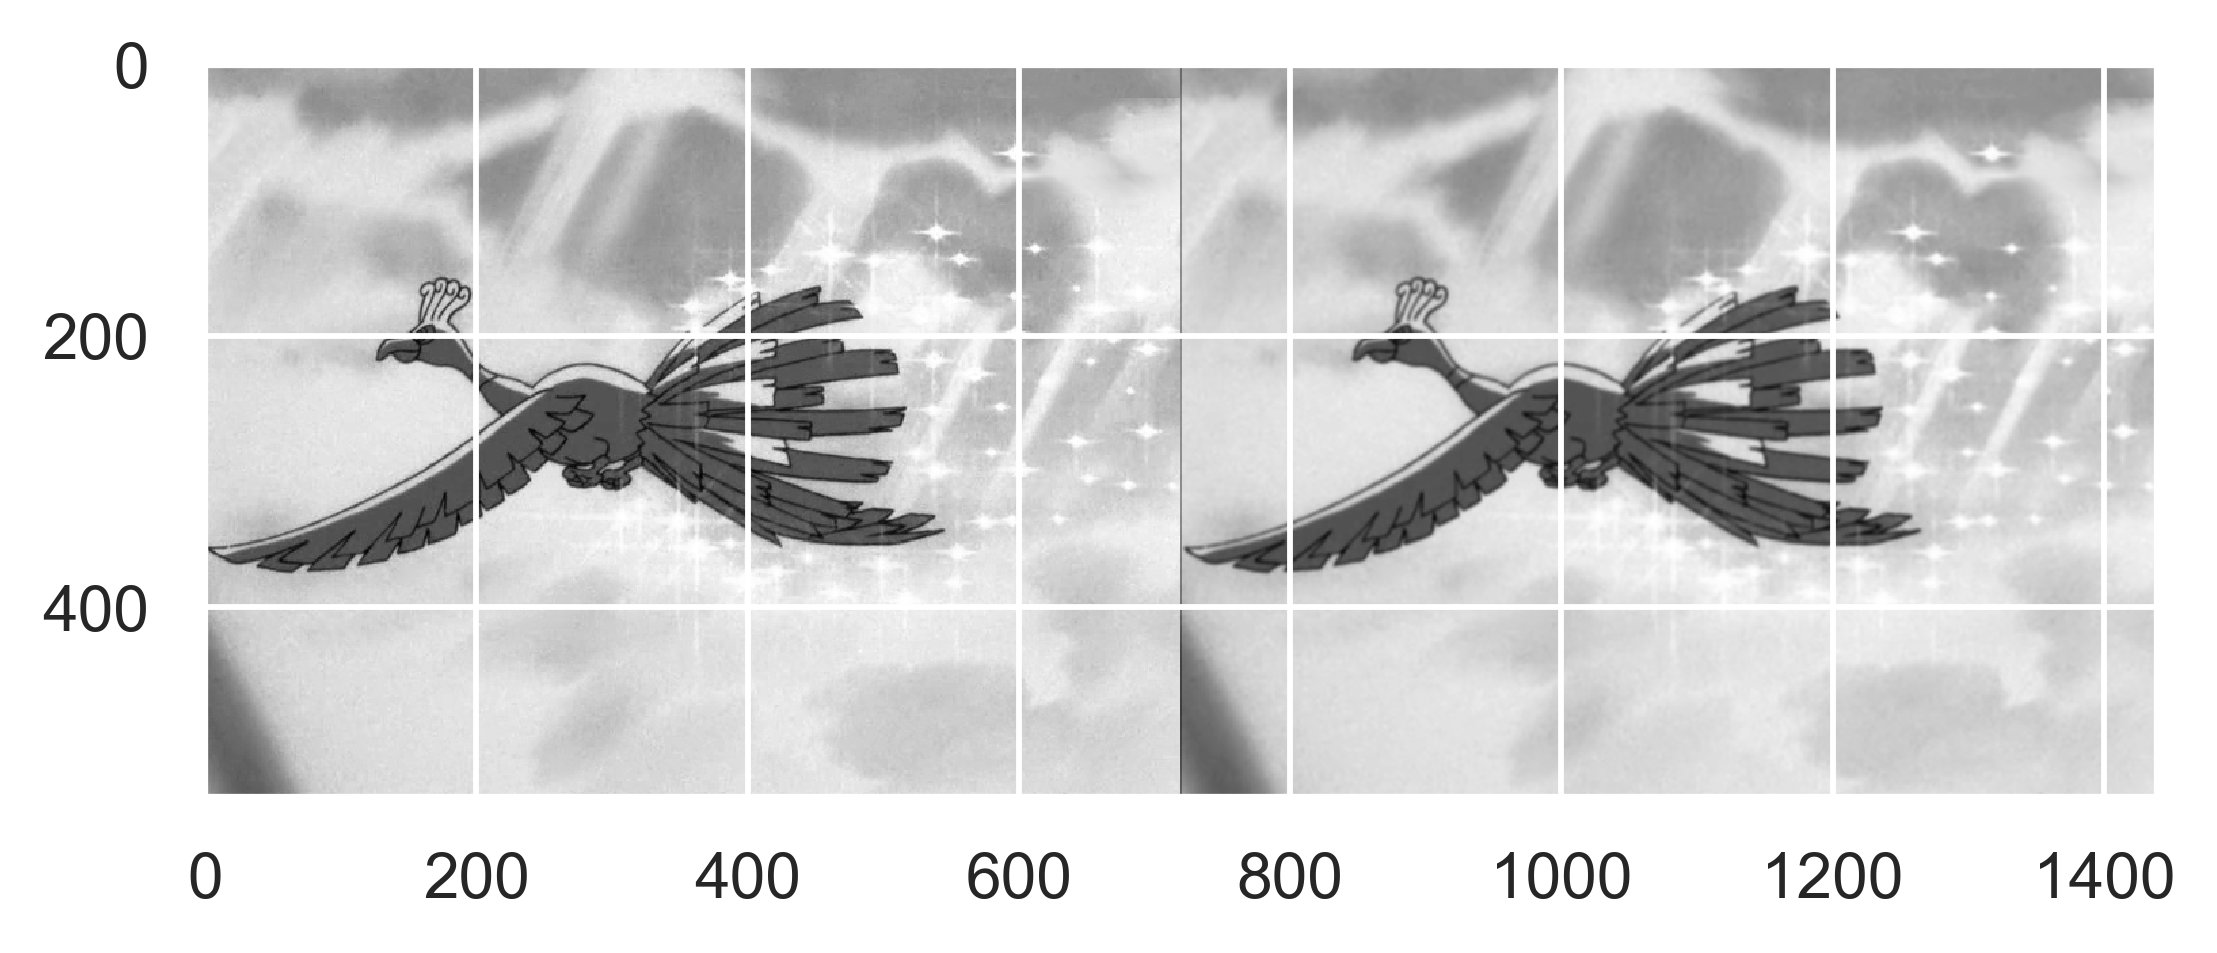

In [22]:
CbThBi(np.asmatrix(im),chooseFilter("average",annotate=False)).Image()

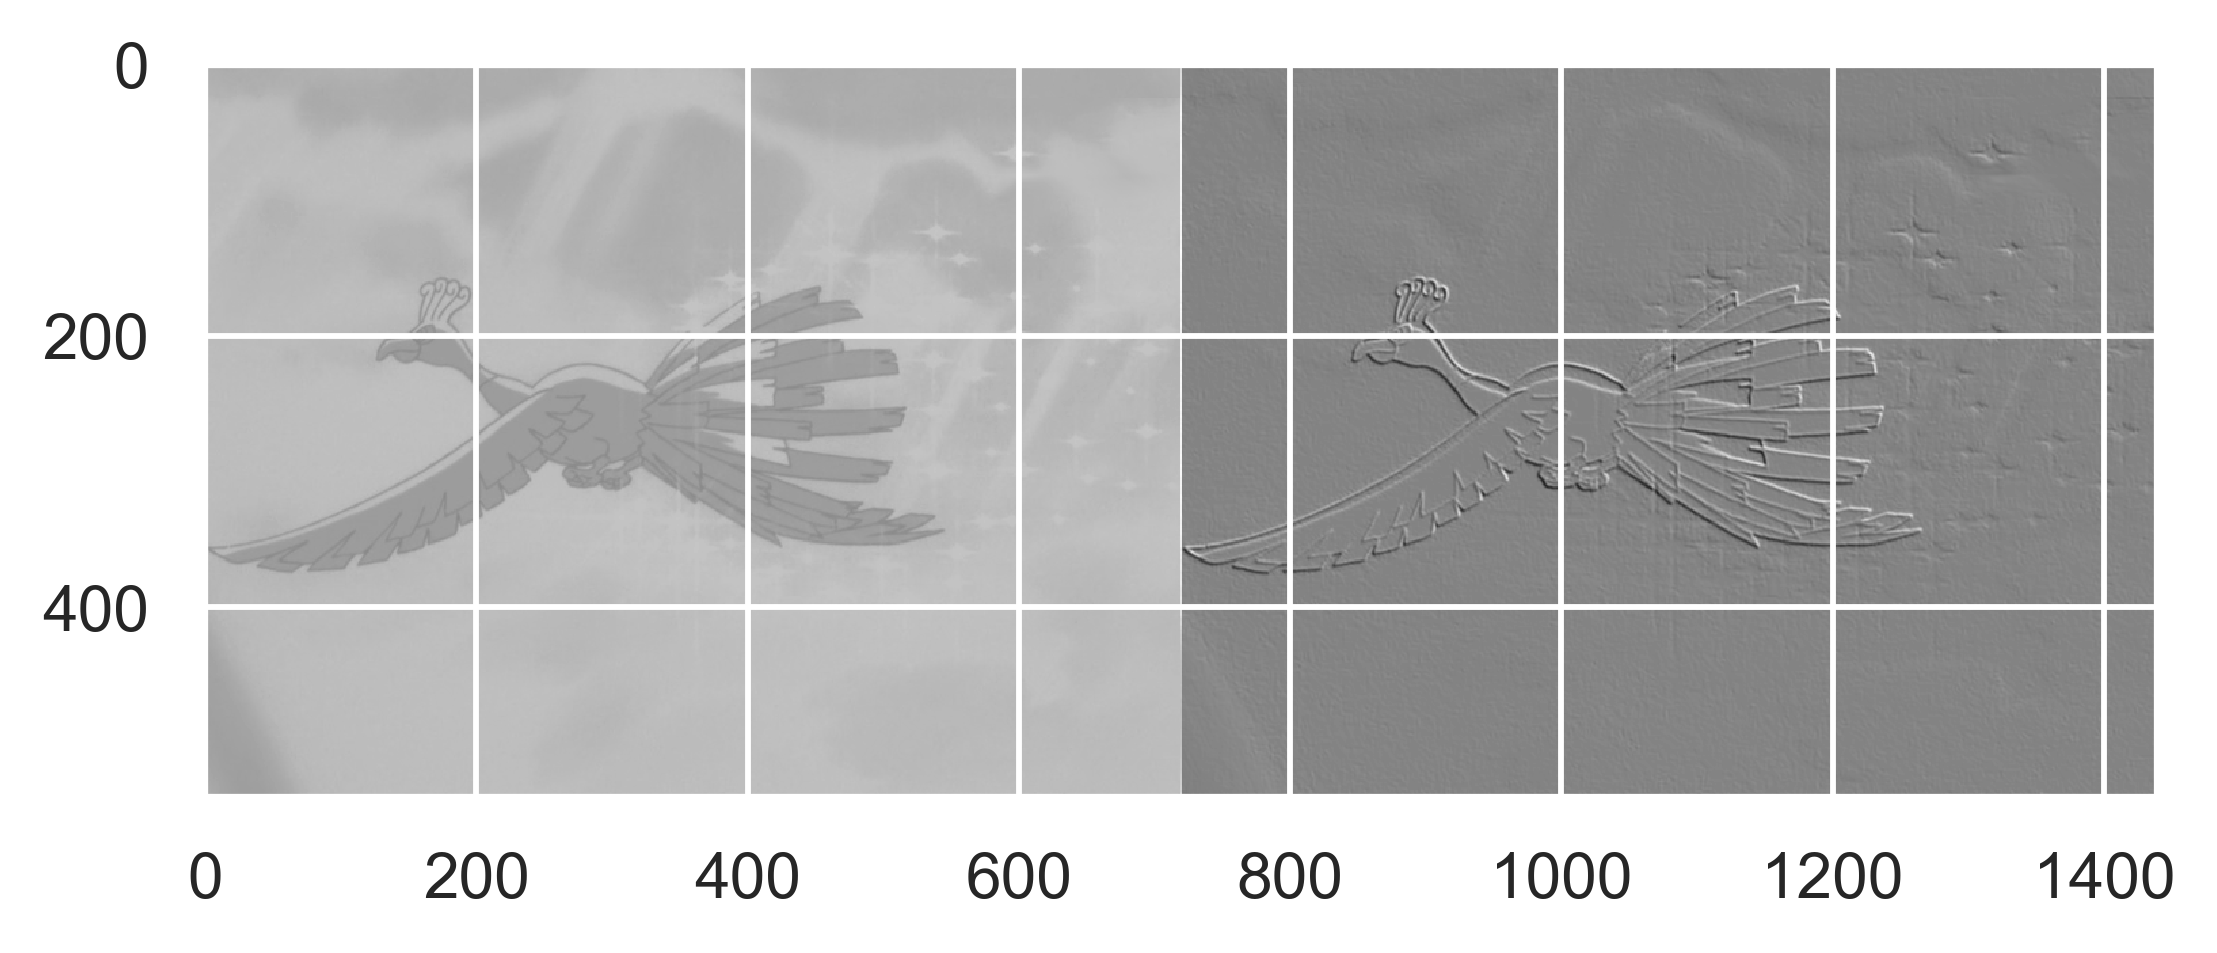

In [23]:
CbThBi(np.asmatrix(im),chooseFilter("prewitt-dx",annotate=False)).Image()

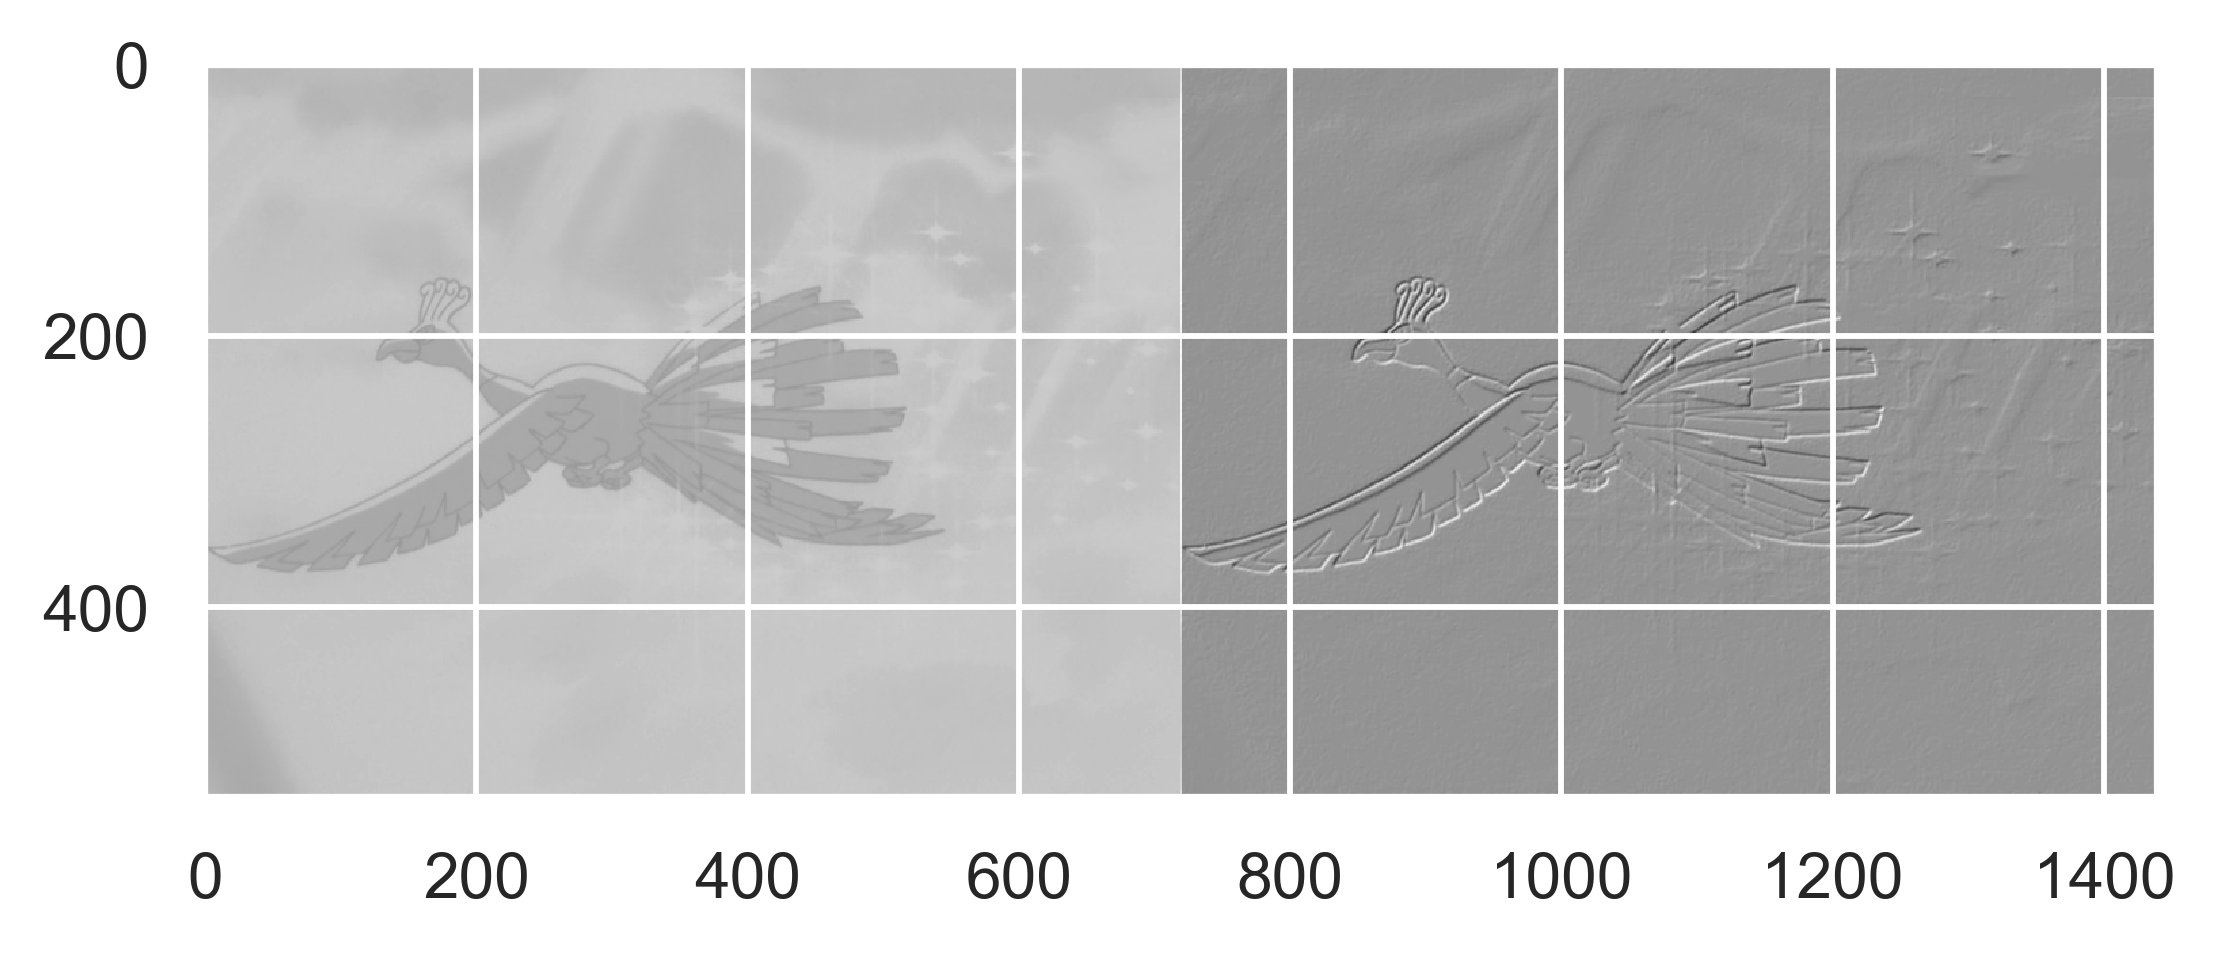

In [24]:
CbThBi(np.asmatrix(im),chooseFilter("prewitt-sx",annotate=False)).Image()

Utilizzando la convoluzione si osserva come i dettagli vengono per lo piu' evidenziati in base alla manovra del filtro (utilizzando un prewitt-sx si notano piu' i dettagli tendenti verso sinistra, mentre al contrario con un filtro prewitt-dx si osservano i dettagli sulla destra, si noti la ala sulla metà dell'immagine). Con una convoluzione di tipo 'average' invece l'immagine si sfuoca.